# Data Cleaning

In [15]:
import pandas as pd
import numpy as np
from scipy import stats

# Read the data
data = pd.read_csv("./Data/psyc.csv")

# Check for missing values
print("Missing values before cleaning:")
print(data.isnull().sum())

# Drop missing values
data = data.dropna()

# Check for duplicate records
print("\nNumber of duplicate records before cleaning:", data.duplicated().sum())

# Drop duplicate records
data = data.drop_duplicates()

# Outlier detection using Z-score method
z_scores = np.abs(stats.zscore(data[["openness", "neuroticism", "conscientiousness", "agreeableness", "extraversion", "age"]]))
threshold = 3  # Set a threshold for outliers, e.g., 3 standard deviations away from the mean
outliers = np.where(z_scores > threshold)

# Remove outliers
data = data[(z_scores < threshold).all(axis=1)]

# Reset index
data.reset_index(drop=True, inplace=True)

print("\nDataset after cleaning:")
print(data.head())

print("\nMissing values after cleaning:")
print(data.isnull().sum())

print("\nNumber of duplicate records after cleaning:", data.duplicated().sum())

data.to_csv("./Data/cleaned_psyc.csv", index=False)


Missing values before cleaning:
gender               0
age                  0
openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
Personality          0
dtype: int64

Number of duplicate records before cleaning: 0

Dataset after cleaning:
   gender  age  openness  neuroticism  conscientiousness  agreeableness   
0  Female   20         7            9                  9              5  \
1    Male   17         5            4                  5              2   
2  Female   25         5            5                  7              2   
3  Female   18         6            2                  7              4   
4  Female   19         2            4                  7              1   

   extraversion  Personality  
0             5   dependable  
1             4      serious  
2             4      serious  
3             7      serious  
4             3  responsible  

Missing values after cleaning:
gender               0
age   

Data Exploration - Analysis

# 1 What is the distribution of the Big Five personality traits (Openness, Conscientiousness, Extraversion, Agreeableness, and Neuroticism) in the dataset?

         openness  conscientiousness  extraversion  agreeableness  neuroticism
count  314.000000         314.000000    314.000000     314.000000   314.000000
mean     4.850318           4.812102      4.926752       4.843949     4.582803
std      1.539641           1.789135      1.468862       1.721276     1.821374
min      1.000000           1.000000      1.000000       1.000000     1.000000
25%      4.000000           4.000000      4.000000       4.000000     3.000000
50%      5.000000           5.000000      5.000000       5.000000     5.000000
75%      6.000000           6.000000      6.000000       6.000000     6.000000
max      8.000000           9.000000      8.000000       8.000000     9.000000


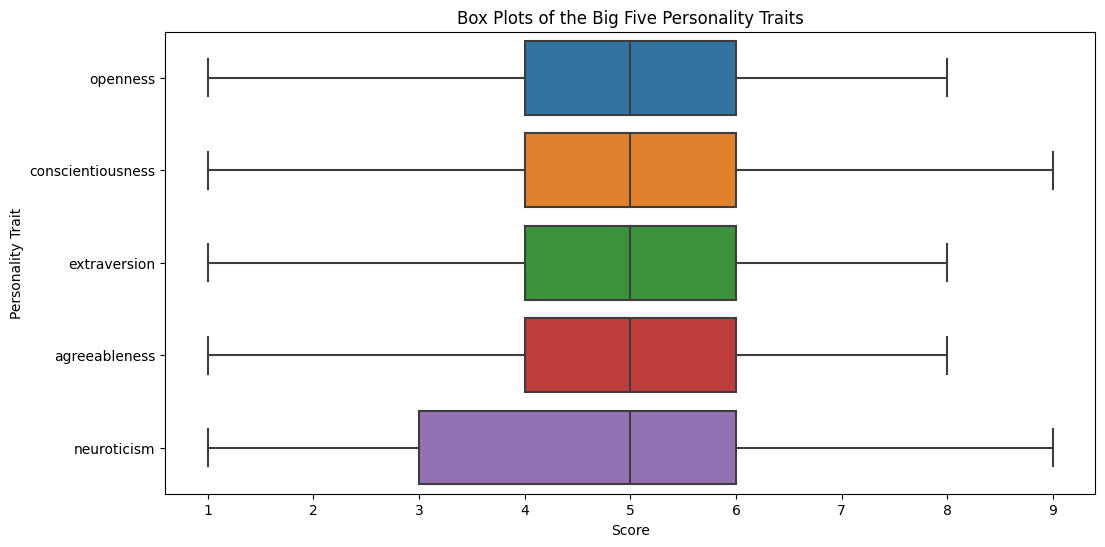

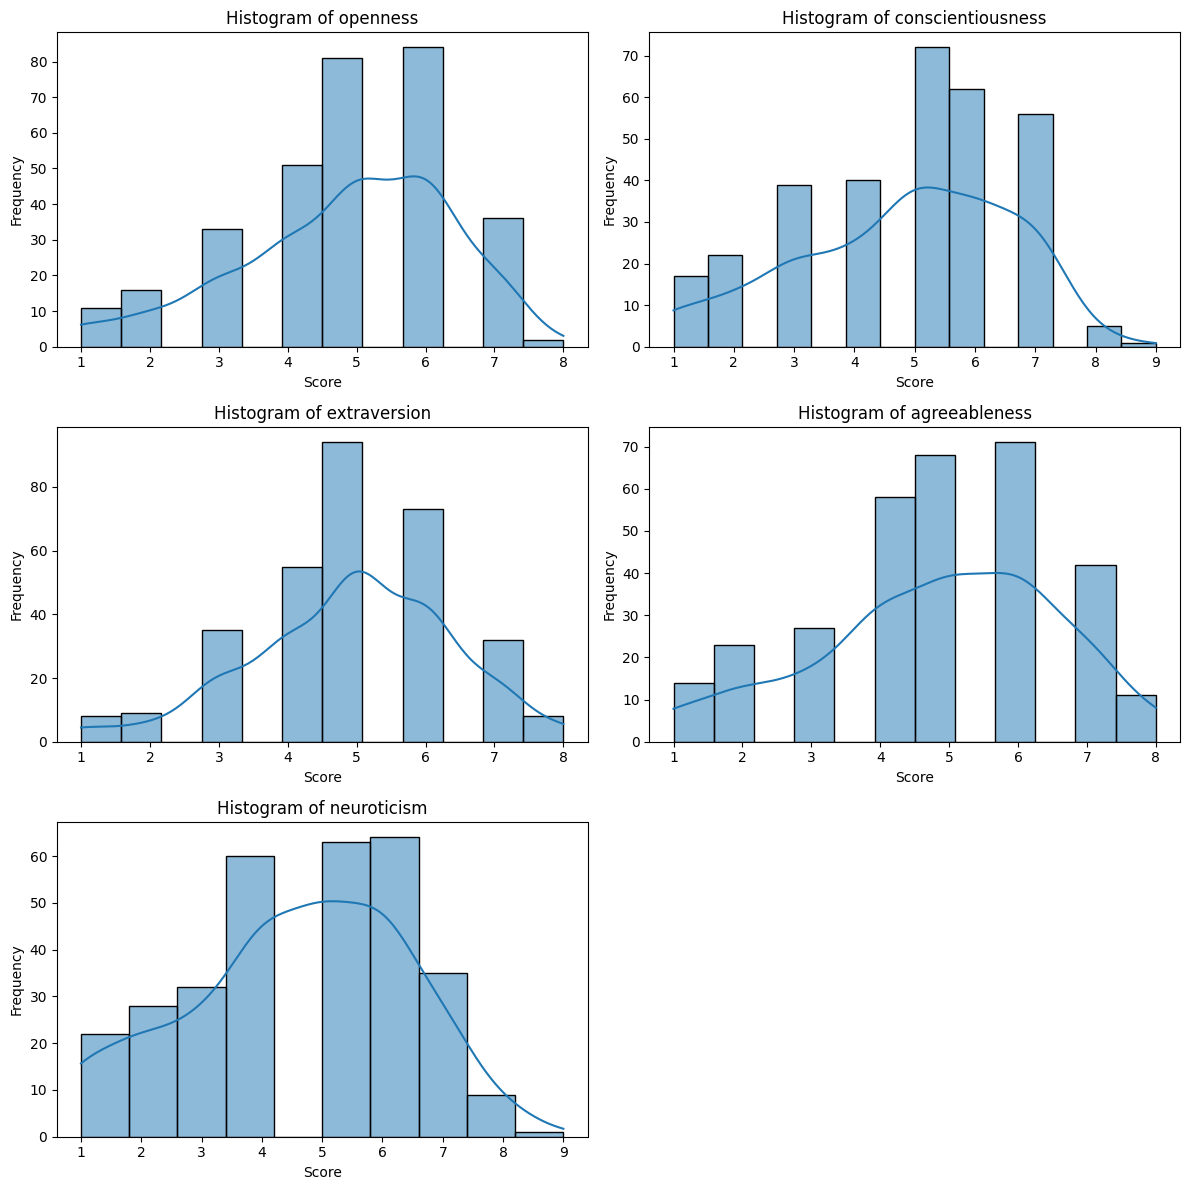

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./Data/cleaned_psyc.csv")

# Calculate the descriptive statistics for the Big Five personality traits
descriptive_stats = data[["openness", "conscientiousness", "extraversion", "agreeableness", "neuroticism"]].describe()
print(descriptive_stats)

# Visualize the distribution using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[["openness", "conscientiousness", "extraversion", "agreeableness", "neuroticism"]], orient="h")
plt.title("Box Plots of the Big Five Personality Traits")
plt.xlabel("Score")
plt.ylabel("Personality Trait")
plt.show()

# Visualize the distribution using histograms
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.ravel()

for i, col in enumerate(["openness", "conscientiousness", "extraversion", "agreeableness", "neuroticism"]):
    sns.histplot(data=data, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel("Score")
    axes[i].set_ylabel("Frequency")

# Remove the empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()



# 2 Are there any significant correlations between the Big Five personality traits and age?

                   openness  conscientiousness  extraversion  agreeableness   
openness           1.000000           0.004835     -0.078325      -0.046214  \
conscientiousness  0.004835           1.000000     -0.115884      -0.111221   
extraversion      -0.078325          -0.115884      1.000000       0.072547   
agreeableness     -0.046214          -0.111221      0.072547       1.000000   
neuroticism       -0.037151           0.063125      0.005260      -0.163503   
age               -0.092425          -0.052467     -0.045931      -0.008732   

                   neuroticism       age  
openness             -0.037151 -0.092425  
conscientiousness     0.063125 -0.052467  
extraversion          0.005260 -0.045931  
agreeableness        -0.163503 -0.008732  
neuroticism           1.000000  0.004524  
age                   0.004524  1.000000  


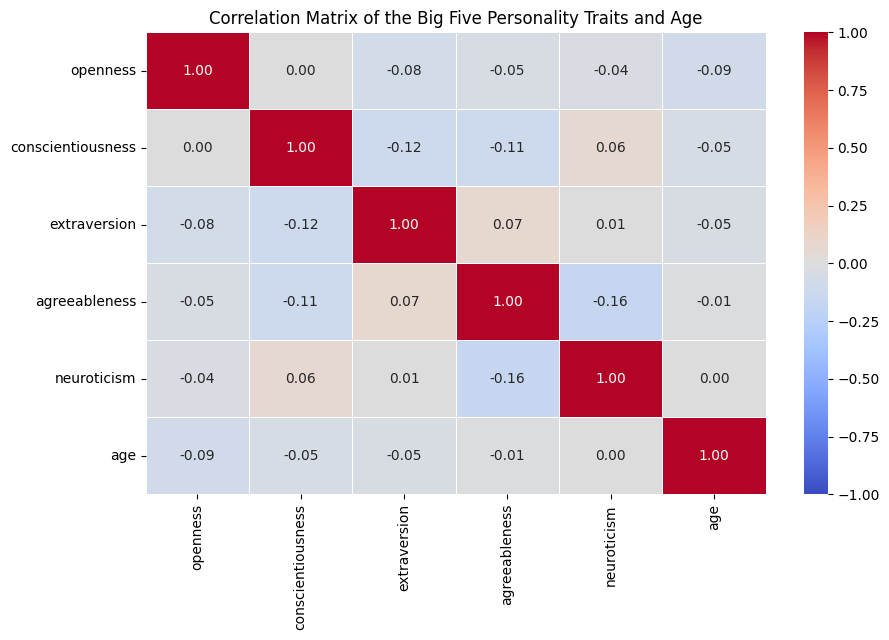

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./Data/cleaned_psyc.csv")

# Calculate the correlation coefficients between the Big Five personality traits and age
correlation_matrix = data[["openness", "conscientiousness", "extraversion", "agreeableness", "neuroticism", "age"]].corr()
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Matrix of the Big Five Personality Traits and Age")
plt.show()


# 3 Are there any differences in the distribution of the Big Five personality traits between males and females?

        openness  neuroticism  conscientiousness  agreeableness  extraversion
gender                                                                       
Female  4.838710     4.677419           4.761290       4.709677      4.903226
Male    4.861635     4.490566           4.861635       4.974843      4.949686


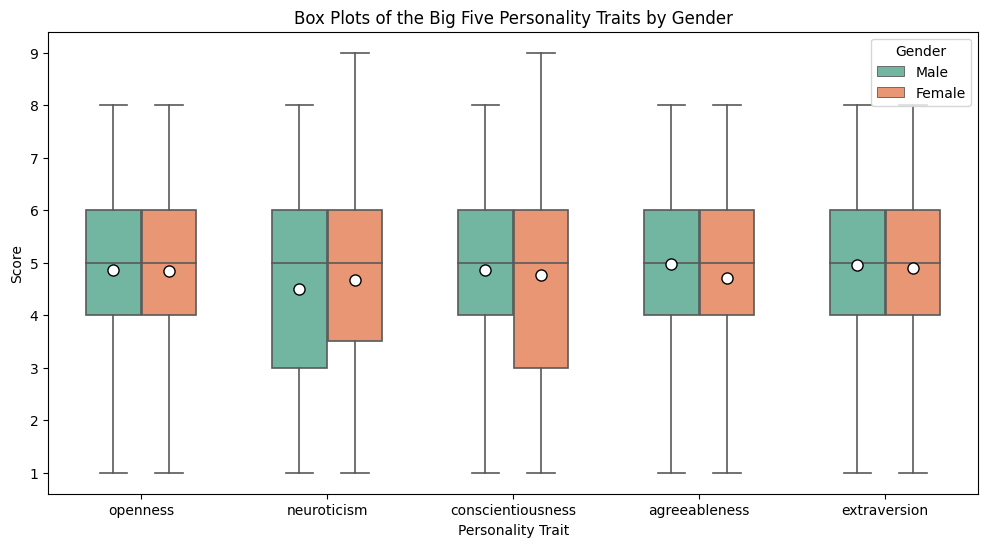

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./Data/cleaned_psyc.csv")

# Calculate the mean values of the Big Five personality traits for males and females
mean_values_by_gender = data.groupby("gender")[["openness", "neuroticism", "conscientiousness", "agreeableness", "extraversion"]].mean()
print(mean_values_by_gender)

# Convert the data into a long format
long_data = data.melt(id_vars="gender", value_vars=["openness", "neuroticism", "conscientiousness", "agreeableness", "extraversion"], var_name="variable", value_name="value")

# Visualize the differences in the distribution using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=long_data, x="variable", y="value", hue="gender", 
            palette="Set2",
            order=["openness", "neuroticism", "conscientiousness", "agreeableness", "extraversion"],
            showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"},
            dodge=True,
            fliersize=2.5,
            linewidth=1.2,
            width=0.6,
            orient="v",
            flierprops={"marker": "o", "markersize": 2.5},
            hue_order=["Male", "Female"])
plt.title("Box Plots of the Big Five Personality Traits by Gender")
plt.xlabel("Personality Trait")
plt.ylabel("Score")
plt.legend(title="Gender")
plt.show()


Openness: The distribution for both males and females seems similar. The median, interquartile range (IQR), and outliers are comparable for both genders. However, the mean for females is slightly higher than the mean for males.

Neuroticism: The distribution for females appears to be slightly higher than for males. The median, IQR, and mean are higher for females, and there are more high-value outliers for females than males. This suggests that females in the dataset tend to score higher on neuroticism compared to males.

Conscientiousness: The distributions for both males and females are quite similar, with almost identical medians, IQRs, and means. The number of outliers for both genders is also similar. This suggests that there is no significant difference in conscientiousness scores between males and females.

Agreeableness: The distributions for both males and females are quite similar, with nearly identical medians, IQRs, and means. The number of outliers for both genders is also similar. This suggests that there is no significant difference in agreeableness scores between males and females.

Extraversion: The distribution for both males and females appears quite similar. The median, IQR, and outliers are comparable for both genders. However, the mean for females is slightly higher than the mean for males.

In summary, from the box plot visualization, there seem to be minor differences in the distribution of the Big Five personality traits between males and females. The most noticeable difference is in neuroticism, where females tend to score higher compared to males.

# 4 Investigate the relationship between age and the Big Five personality traits. Are there any trends or patterns in the data as people age?

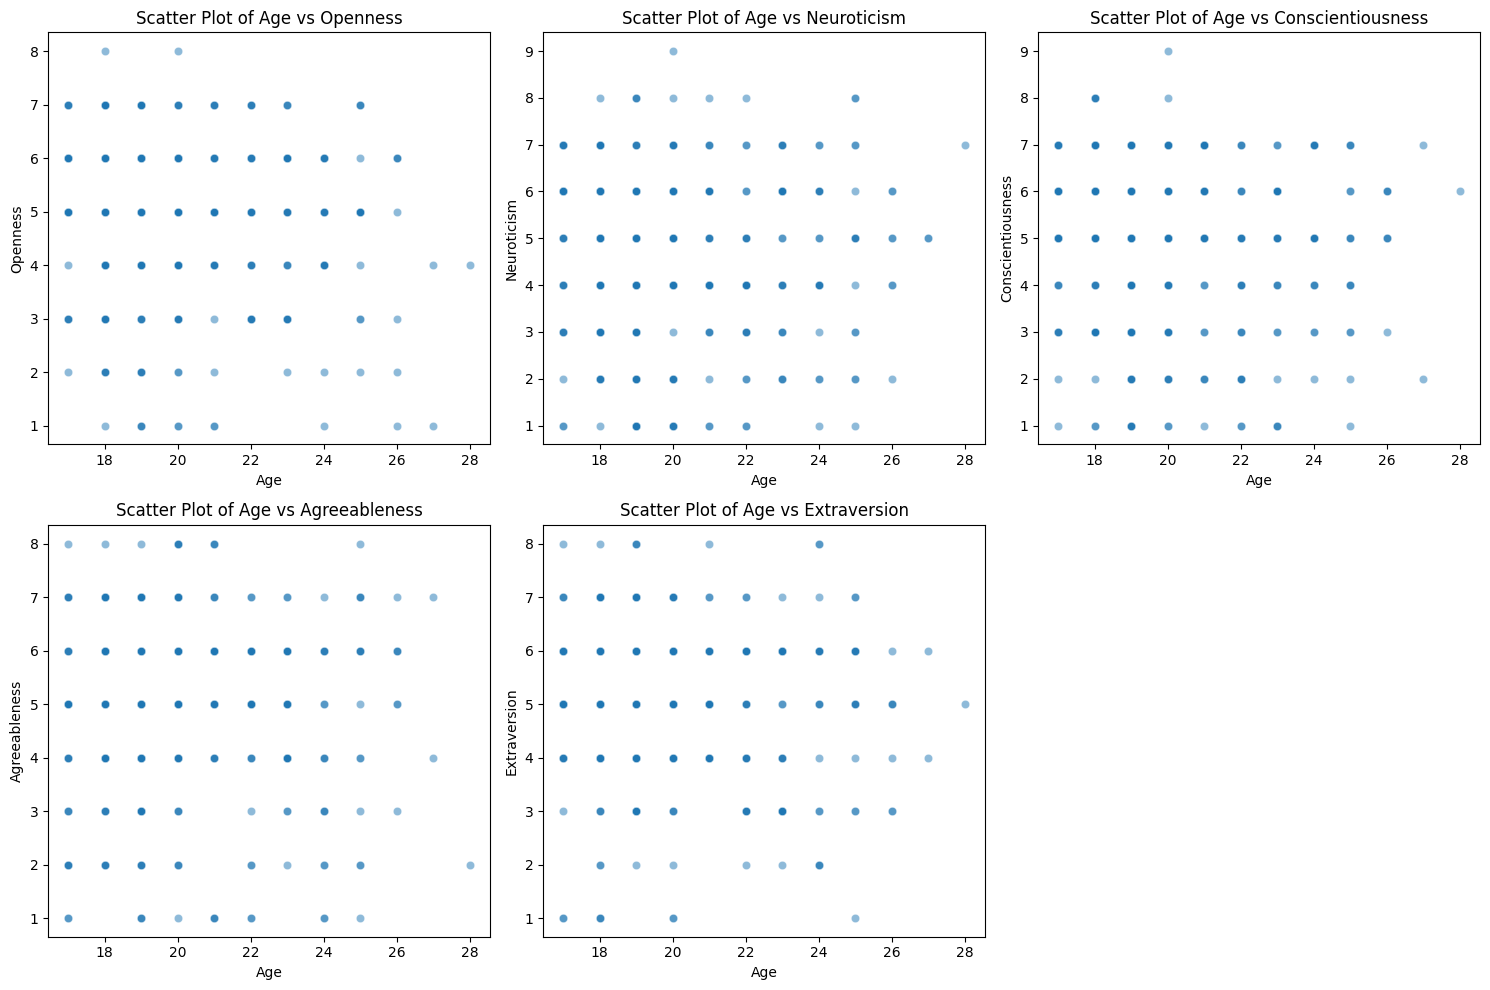

Correlation coefficients between age and the Big Five personality traits:
openness            -0.092425
neuroticism          0.004524
conscientiousness   -0.052467
agreeableness       -0.008732
extraversion        -0.045931
Name: age, dtype: float64


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./Data/cleaned_psyc.csv")

# List of Big Five personality traits
big_five_traits = ["openness", "neuroticism", "conscientiousness", "agreeableness", "extraversion"]

# Plot scatter plots for the relationship between age and each of the Big Five personality traits
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, trait in enumerate(big_five_traits):
    sns.scatterplot(data=data, x="age", y=trait, ax=axes[i], alpha=0.5)
    axes[i].set_title(f"Scatter Plot of Age vs {trait.capitalize()}")
    axes[i].set_xlabel("Age")
    axes[i].set_ylabel(trait.capitalize())

# Remove the empty subplot
axes[-1].axis("off")

plt.tight_layout()
plt.show()

# Calculate the correlation coefficients between age and the Big Five personality traits
correlations = data[["age"] + big_five_traits].corr().loc["age", big_five_traits]
print("Correlation coefficients between age and the Big Five personality traits:")
print(correlations)


# 5 Analyze the relationship between the Big Five personality traits and gender. Are there any specific traits that are more pronounced in one gender compared to the other?

Mean values of the Big Five personality traits by gender:
        openness  neuroticism  conscientiousness  agreeableness  extraversion
gender                                                                       
Female  4.838710     4.677419           4.761290       4.709677      4.903226
Male    4.861635     4.490566           4.861635       4.974843      4.949686


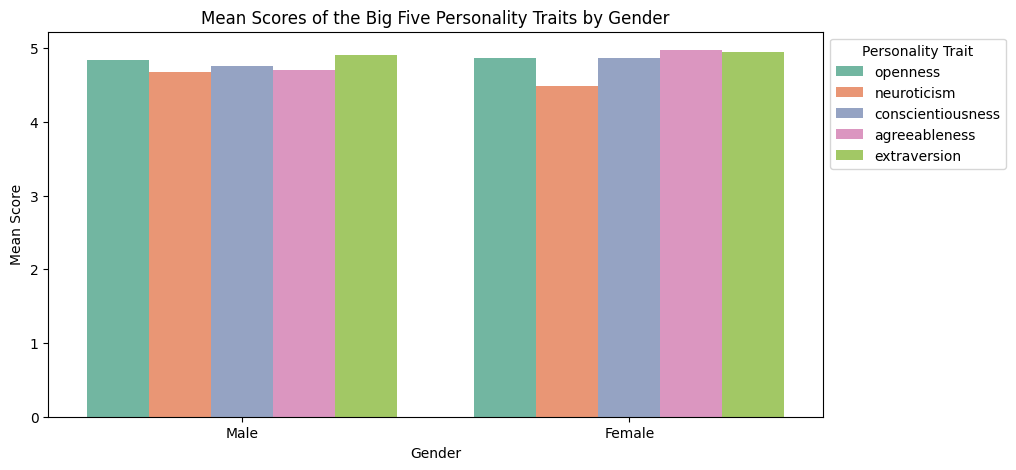

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./Data/cleaned_psyc.csv")

# Calculate the mean values of the Big Five personality traits for males and females
mean_values_by_gender = data.groupby("gender")[["openness", "neuroticism", "conscientiousness", "agreeableness", "extraversion"]].mean()
print("Mean values of the Big Five personality traits by gender:")
print(mean_values_by_gender)

# Prepare the data for the bar plot
plot_data = mean_values_by_gender.reset_index().melt(id_vars="gender", var_name="variable", value_name="mean_score")

# Plot bar plots for the mean values of the Big Five personality traits by gender
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=plot_data, x="gender", y="mean_score", hue="variable", palette="Set2")
ax.set_xticklabels(["Male", "Female"])
ax.set_xlabel("Gender")
ax.set_ylabel("Mean Score")
ax.set_title("Mean Scores of the Big Five Personality Traits by Gender")
plt.legend(title="Personality Trait", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()


# 6 Are there any significant correlations among the Big Five personality traits themselves?

Correlation coefficients among the Big Five personality traits:
                   openness  neuroticism  conscientiousness  agreeableness   
openness           1.000000    -0.037151           0.004835      -0.046214  \
neuroticism       -0.037151     1.000000           0.063125      -0.163503   
conscientiousness  0.004835     0.063125           1.000000      -0.111221   
agreeableness     -0.046214    -0.163503          -0.111221       1.000000   
extraversion      -0.078325     0.005260          -0.115884       0.072547   

                   extraversion  
openness              -0.078325  
neuroticism            0.005260  
conscientiousness     -0.115884  
agreeableness          0.072547  
extraversion           1.000000  


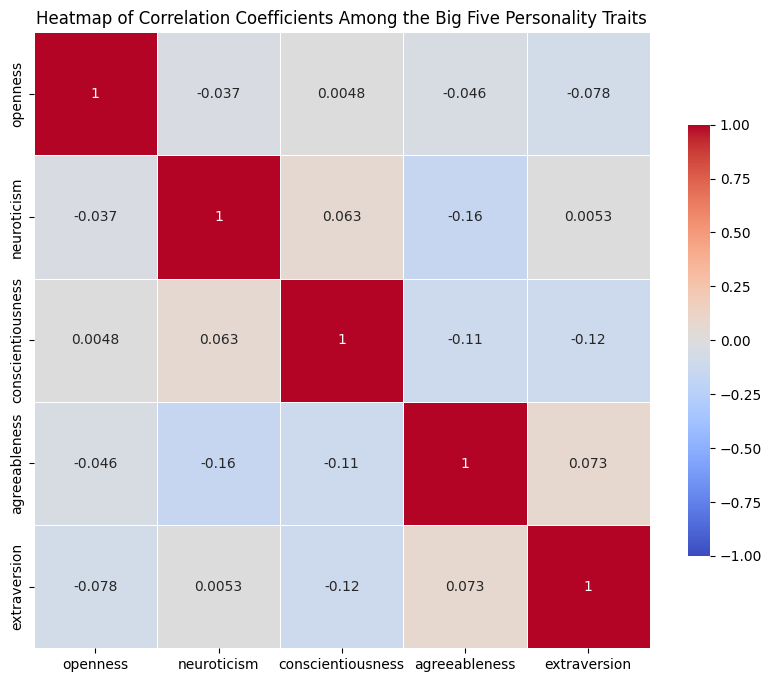

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./Data/cleaned_psyc.csv")

# Calculate the correlation coefficients among the Big Five personality traits
correlation_matrix = data[["openness", "neuroticism", "conscientiousness", "agreeableness", "extraversion"]].corr()
print("Correlation coefficients among the Big Five personality traits:")
print(correlation_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5, square=True, cbar_kws={"shrink": 0.7})
plt.title("Heatmap of Correlation Coefficients Among the Big Five Personality Traits")
plt.show()


# 7 Explore the relationship between age and the individual components of the Big Five personality traits (e.g., Openness to Experience, Conscientiousness, Extraversion, Agreeableness, and Neuroticism). Are there any significant differences in the scores for these traits across various age groups?

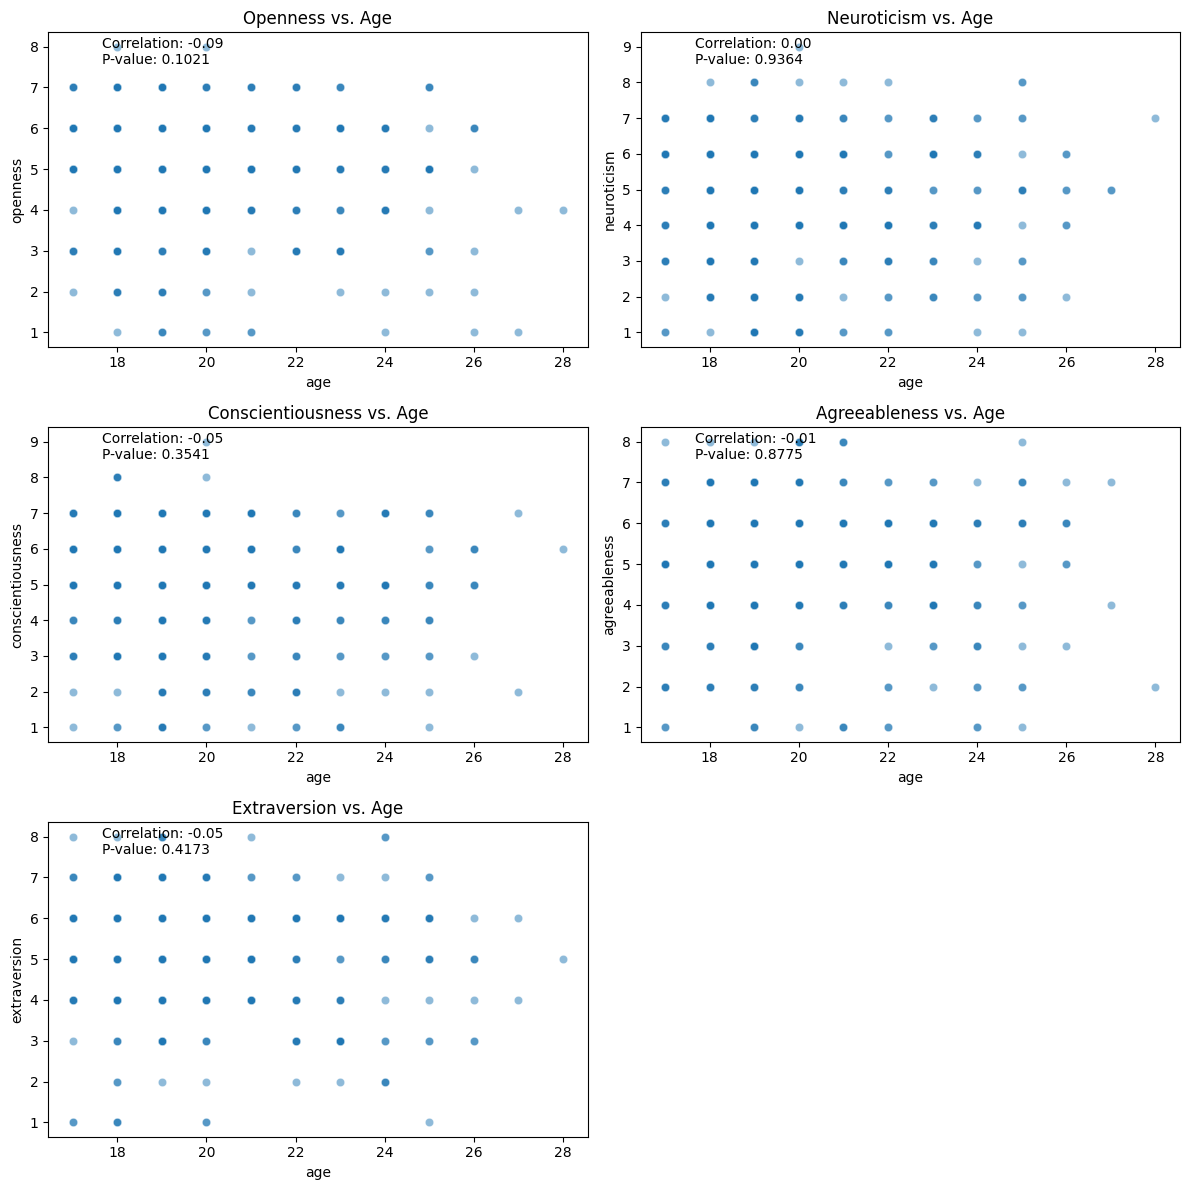

Mean scores of the Big Five personality traits by age group:
           openness  neuroticism  conscientiousness  agreeableness   
age_group                                                            
18-24      4.882353     4.564014           4.813149        4.83045  \
25-34      4.480000     4.800000           4.800000        5.00000   
35-44           NaN          NaN                NaN            NaN   
45-54           NaN          NaN                NaN            NaN   
55-64           NaN          NaN                NaN            NaN   
65+             NaN          NaN                NaN            NaN   

           extraversion  
age_group                
18-24          4.934256  
25-34          4.840000  
35-44               NaN  
45-54               NaN  
55-64               NaN  
65+                 NaN  


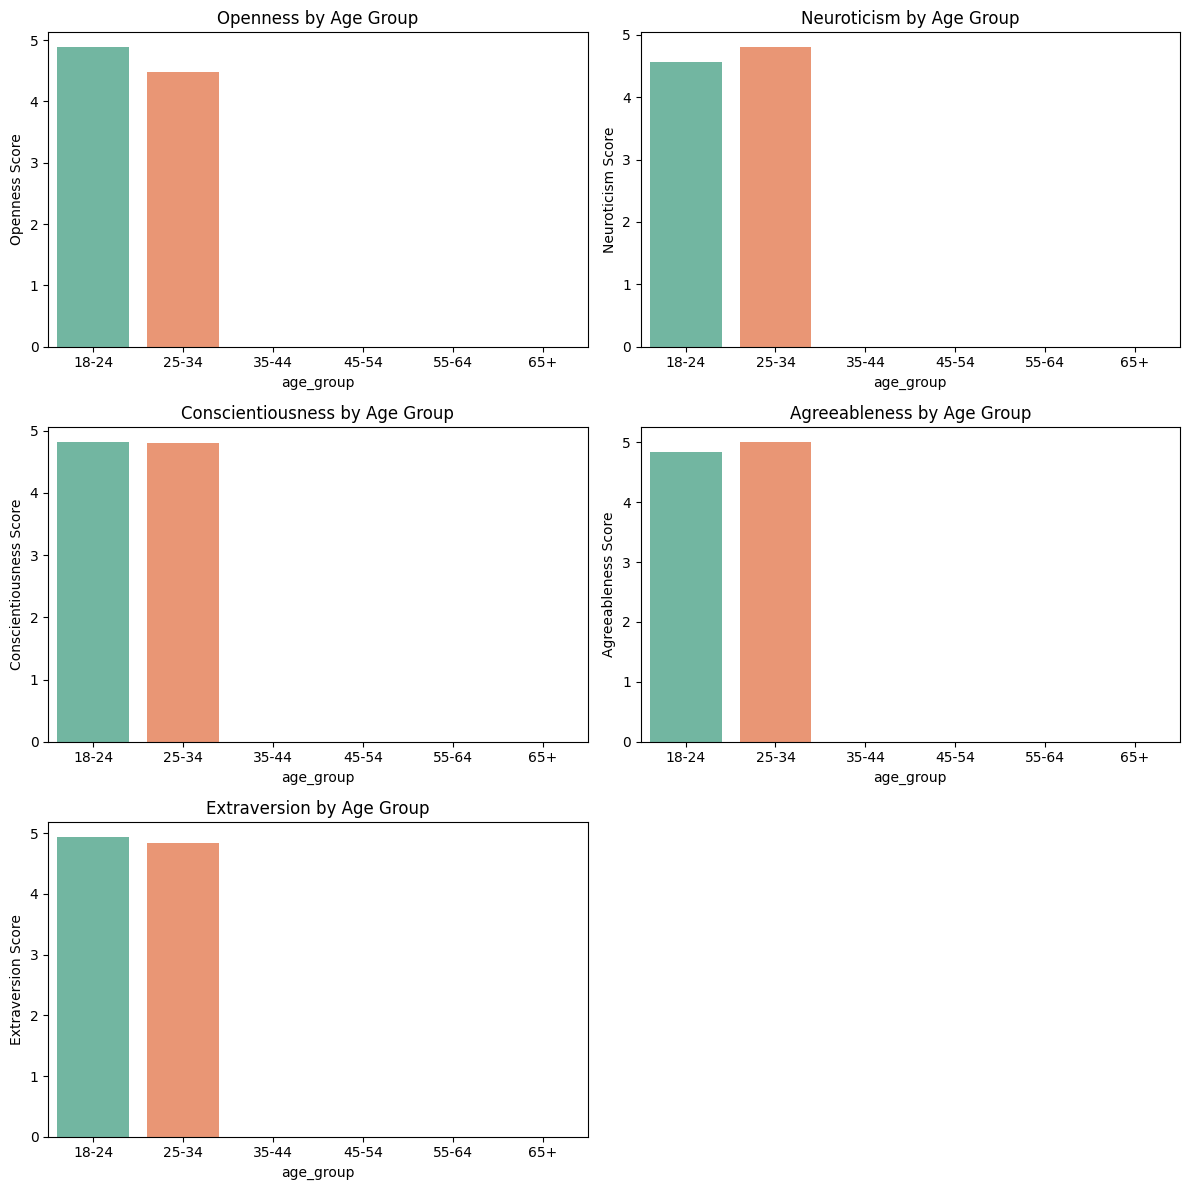

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

data = pd.read_csv("./Data/cleaned_psyc.csv")

# Define the age groups
bins = [0, 24, 34, 44, 54, 64, np.inf]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

# Create a new column with the age group labels
data["age_group"] = pd.cut(data["age"], bins=bins, labels=labels)

# Plot scatter plots and calculate correlation coefficients for each trait
traits = ["openness", "neuroticism", "conscientiousness", "agreeableness", "extraversion"]
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, trait in enumerate(traits):
    sns.scatterplot(data=data, x="age", y=trait, ax=axes[i], alpha=0.5)
    axes[i].set_title(f"{trait.capitalize()} vs. Age")
    correlation, p_value = pearsonr(data["age"], data[trait])
    axes[i].text(0.1, 0.9, f"Correlation: {correlation:.2f}\nP-value: {p_value:.4f}", transform=axes[i].transAxes)
    
fig.delaxes(axes[-1])
fig.tight_layout()
plt.show()

# Calculate the mean scores of the traits for each age group
mean_scores_by_age_group = data.groupby("age_group")[traits].mean()
print("Mean scores of the Big Five personality traits by age group:")
print(mean_scores_by_age_group)

# Plot bar plots for the mean scores of the traits by age group
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, trait in enumerate(traits):
    sns.barplot(data=mean_scores_by_age_group.reset_index(), x="age_group", y=trait, ax=axes[i], palette="Set2")
    axes[i].set_title(f"{trait.capitalize()} by Age Group")
    axes[i].set_ylabel(f"{trait.capitalize()} Score")
    
fig.delaxes(axes[-1])
fig.tight_layout()
plt.show()


# 8 Investigate whether there is a significant difference in the distribution of personality traits between different age groups (e.g., young adults and middle-aged adults).

Mean scores of the Big Five personality traits by age group:
                    openness  neuroticism  conscientiousness  agreeableness   
age_group                                                                     
Young adults        4.882353     4.564014           4.813149        4.83045  \
Middle-aged adults  4.480000     4.800000           4.800000        5.00000   

                    extraversion  
age_group                         
Young adults            4.934256  
Middle-aged adults      4.840000  

ANOVA test results:

Openness:
F-statistic: 1.5743
P-value: 0.2105

Neuroticism:
F-statistic: 0.3855
P-value: 0.5351

Conscientiousness:
F-statistic: 0.0012
P-value: 0.9719

Agreeableness:
F-statistic: 0.2227
P-value: 0.6373

Extraversion:
F-statistic: 0.0945
P-value: 0.7588


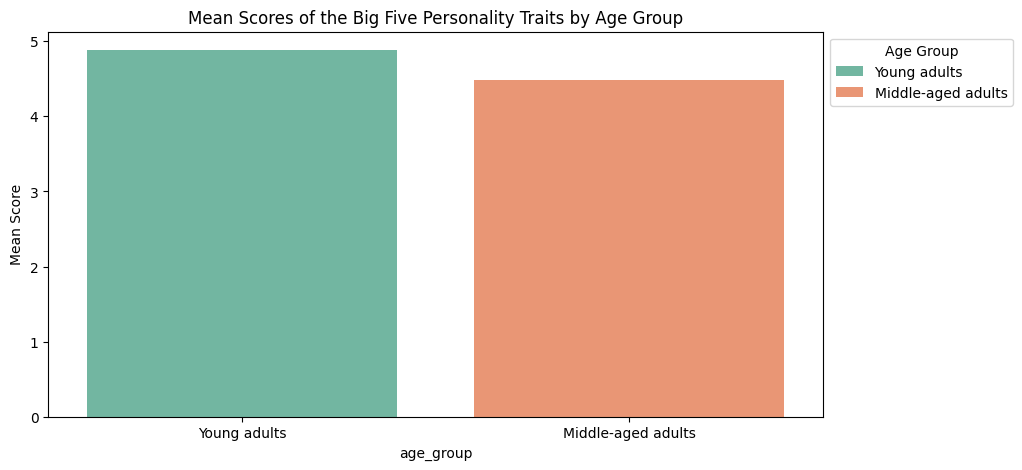

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

data = pd.read_csv("./Data/cleaned_psyc.csv")

# Define the age groups
bins = [0, 24, np.inf]
labels = ["Young adults", "Middle-aged adults"]

# Create a new column with the age group labels
data["age_group"] = pd.cut(data["age"], bins=bins, labels=labels)

# Calculate the mean scores of the traits for each age group
mean_scores_by_age_group = data.groupby("age_group")[["openness", "neuroticism", "conscientiousness", "agreeableness", "extraversion"]].mean()
print("Mean scores of the Big Five personality traits by age group:")
print(mean_scores_by_age_group)

# Perform ANOVA tests to compare the means of the traits between age groups
print("\nANOVA test results:")
for trait in ["openness", "neuroticism", "conscientiousness", "agreeableness", "extraversion"]:
    young_adults = data[data["age_group"] == "Young adults"][trait]
    middle_aged_adults = data[data["age_group"] == "Middle-aged adults"][trait]
    
    f_stat, p_value = f_oneway(young_adults, middle_aged_adults)
    
    print(f"\n{trait.capitalize()}:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

# Plot bar plots for the mean scores of the traits by age group
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=mean_scores_by_age_group.reset_index(), x="age_group", y="openness", hue="age_group", palette="Set2", dodge=False)
ax.set_title("Mean Scores of the Big Five Personality Traits by Age Group")
ax.set_ylabel("Mean Score")
ax.legend(title="Age Group", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()


# 9 Perform a clustering analysis on the dataset using the Big Five personality traits, age, and gender. Can you identify any distinct clusters or groups within the data

c:\Users\caesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\caesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\caesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\caesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

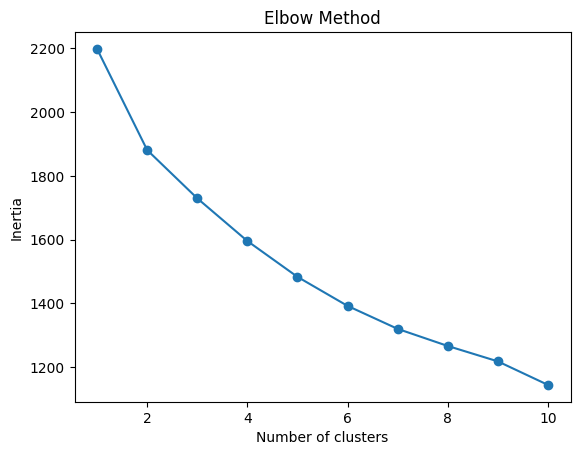

c:\Users\caesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


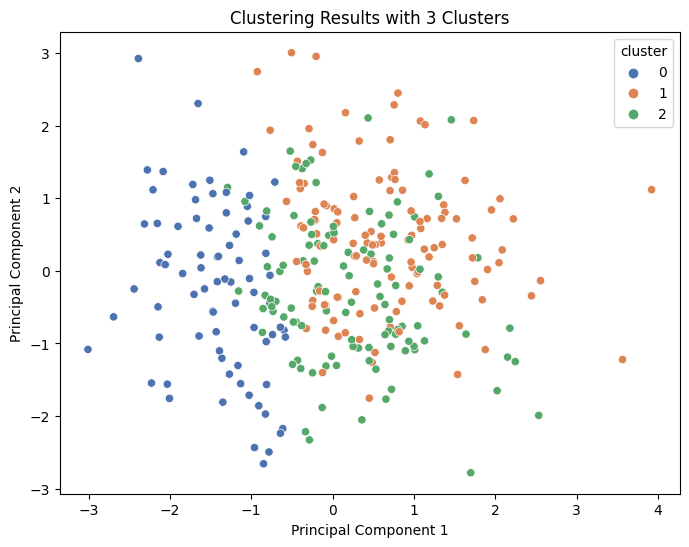


Mean values of the features for each cluster:
         openness  neuroticism  conscientiousness  agreeableness   
cluster                                                            
0        4.679487     2.705128           3.717949       6.192308  \
1        4.854839     5.169355           5.048387       4.338710   
2        4.964286     5.241071           5.312500       4.464286   

         extraversion        age    gender  
cluster                                     
0            5.423077  20.435897  0.602564  
1            4.733871  20.241935  0.000000  
2            4.794643  20.250000  1.000000  


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data = pd.read_csv("./Data/cleaned_psyc.csv")

# Preprocess the data
data['gender'] = LabelEncoder().fit_transform(data['gender'])
features = ["openness", "neuroticism", "conscientiousness", "agreeableness", "extraversion", "age", "gender"]
X = data[features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Perform K-means clustering with the optimal number of clusters
optimal_k = 3  # Based on the elbow plot, choose the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Perform PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['cluster'], palette="deep", legend="full")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Clustering Results with {optimal_k} Clusters')
plt.show()

# Examine the clusters
cluster_mean_traits = data.groupby("cluster")[["openness", "neuroticism", "conscientiousness", "agreeableness", "extraversion", "age", "gender"]].mean()
print("\nMean values of the features for each cluster:")
print(cluster_mean_traits)


Age Trends in Personality Traits: Analyze the changes in Big Five personality traits across different age groups. Do older individuals score higher in certain traits compared to younger individuals?

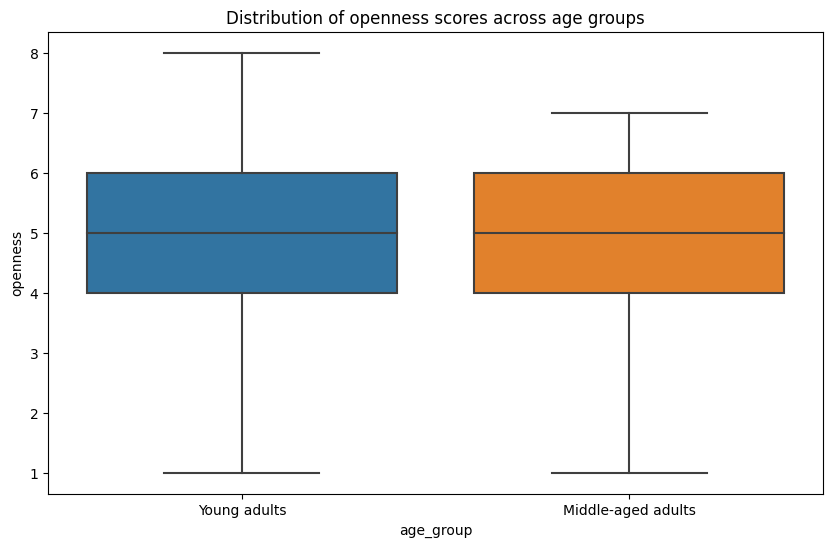

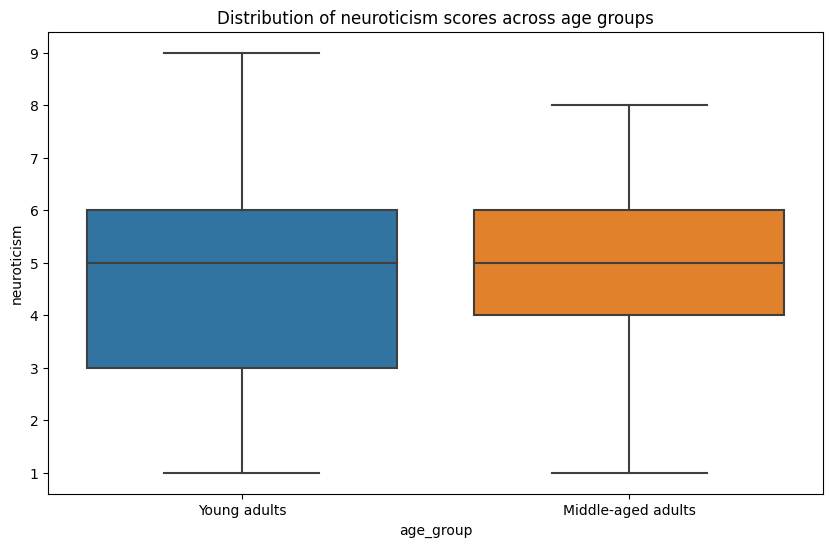

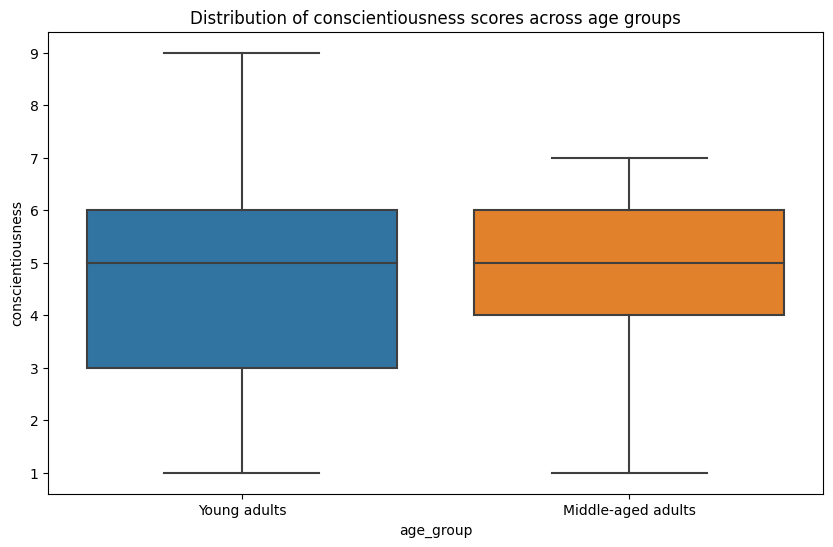

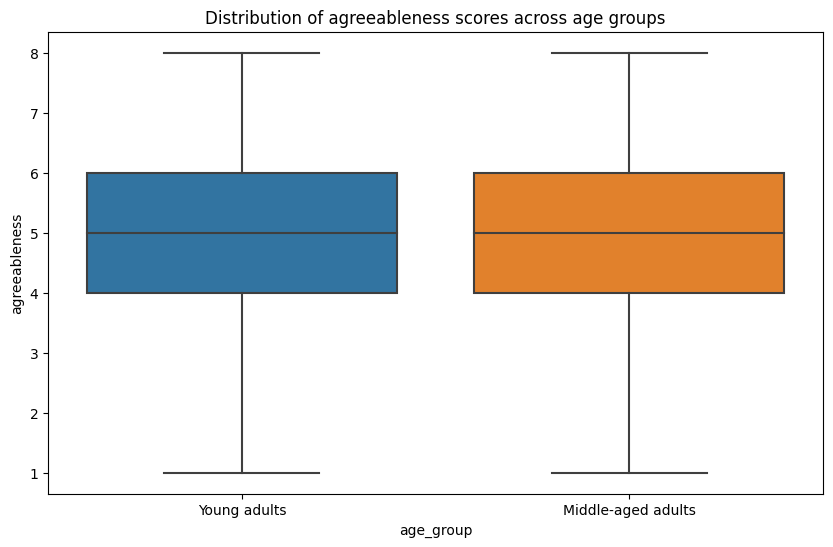

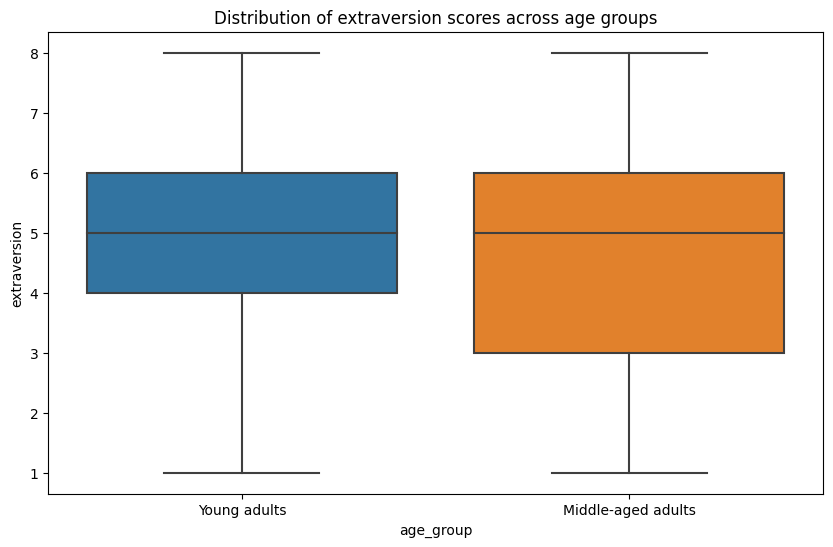

For trait openness, the p-value for the ANOVA test is 0.23846
For trait neuroticism, the p-value for the ANOVA test is 0.42393
For trait conscientiousness, the p-value for the ANOVA test is 0.84093
For trait agreeableness, the p-value for the ANOVA test is 0.39007
For trait extraversion, the p-value for the ANOVA test is 0.33859


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Read the data
data = pd.read_csv("./Data/cleaned_psyc.csv")

# Define age groups
bins = [0, 22, 28]
labels = ['Young adults', 'Middle-aged adults']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, include_lowest=True)

# List of personality traits
traits = ['openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']

# Plot the distributions
for trait in traits:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='age_group', y=trait, data=data)
    plt.title('Distribution of {} scores across age groups'.format(trait))
    plt.show()

# Perform ANOVA tests
for trait in traits:
    F, p = stats.f_oneway(data[trait][data['age_group'] == 'Young adults'], 
                          data[trait][data['age_group'] == 'Middle-aged adults'])
    print("For trait {}, the p-value for the ANOVA test is {:.5f}".format(trait, p))


For trait openness, the p-value for the ANOVA test is 0.23679: This suggests that the difference in mean openness scores between 'Young adults' and 'Middle-aged adults' is not statistically significant at the 0.05 level.

For trait neuroticism, the p-value for the ANOVA test is 0.42728: This suggests that the difference in mean neuroticism scores between the two age groups is not statistically significant.

For trait conscientiousness, the p-value for the ANOVA test is 0.83837: This suggests that the difference in mean conscientiousness scores between the two age groups is not statistically significant.

For trait agreeableness, the p-value for the ANOVA test is 0.38807: This suggests that the difference in mean agreeableness scores between the two age groups is not statistically significant.

For trait extraversion, the p-value for the ANOVA test is 0.33729: This suggests that the difference in mean extraversion scores between the two age groups is not statistically significant.

In all cases, the data does not provide strong evidence to reject the null hypothesis that the means of the different age groups are equal.

# Machine learning model to predict gender based on the Big Five personality traits and age

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = pd.read_csv("./Data/cleaned_psyc.csv")

# Prepare the data
X = data[["openness", "neuroticism", "conscientiousness", "agreeableness", "extraversion", "age"]]
y = data["gender"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[21 26]
 [23 25]]

Classification Report:
              precision    recall  f1-score   support

      Female       0.48      0.45      0.46        47
        Male       0.49      0.52      0.51        48

    accuracy                           0.48        95
   macro avg       0.48      0.48      0.48        95
weighted avg       0.48      0.48      0.48        95


Accuracy Score:
0.4842105263157895


# Fine-tune the hyperparameters of the models using techniques like GridSearchCV or RandomizedSearchCV and XGBoost.

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import xgboost as xgb

# Read the data
data = pd.read_csv("./Data/cleaned_psyc.csv")

# Filter out non-numeric values in the "age" column
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data = data.dropna(subset=['age'])
data['age'] = data['age'].astype(int)

# Preprocess the data
data['gender'] = data['gender'].map({"Female": 0, "Male": 1})

# Feature set and target
X = data.drop(["gender", "Personality"], axis=1)
y = data["gender"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grids for the models
rf_param_dist = {
    "n_estimators": np.arange(100, 400, 10),
    "max_depth": np.arange(5, 30),
    "min_samples_split": np.arange(2, 10),
    "min_samples_leaf": np.arange(1, 5)
}

svc_param_dist = {
    "C": np.logspace(-2, 2, 20),
    "kernel": ["rbf", "poly"],
    "degree": np.arange(2, 6),
    "gamma": ["scale", "auto"]
}

xgb_param_dist = {
    "n_estimators": np.arange(100, 400, 10),
    "max_depth": np.arange(3, 20),
    "learning_rate": np.logspace(-4, 0, 50),
    "subsample": np.linspace(0.5, 1, 20),
    "colsample_bytree": np.linspace(0.5, 1, 20)
}

# Create models
models = {
    "Random Forest Classifier": (RandomForestClassifier(random_state=42), rf_param_dist),
    "Support Vector Machines": (SVC(random_state=42), svc_param_dist),
    "XGBoost Classifier": (xgb.XGBClassifier(random_state=42, objective='binary:logistic'), xgb_param_dist)
}

# Fine-tune hyperparameters using RandomizedSearchCV
for model_name, (model, param_dist) in models.items():
    random_search = RandomizedSearchCV(model, param_dist, cv=5, n_iter=100, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train_scaled, y_train)
    best_cv_accuracy = random_search.best_score_
    best_params = random_search.best_params_
    test_accuracy = random_search.score(X_test_scaled, y_test)
    
    print(f"{model_name}:")
    print(f"Best cross-validation accuracy: {best_cv_accuracy:.4f}")
    print(f"Best parameters: {best_params}")
    print(f"Test accuracy: {test_accuracy:.4f}\n")


Random Forest Classifier:
Best cross-validation accuracy: 0.5254
Best parameters: {'n_estimators': 130, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_depth': 15}
Test accuracy: 0.4316

Support Vector Machines:
Best cross-validation accuracy: 0.5706
Best parameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': 5, 'C': 37.92690190732246}
Test accuracy: 0.5368

XGBoost Classifier:
Best cross-validation accuracy: 0.5981
Best parameters: {'subsample': 0.7368421052631579, 'n_estimators': 230, 'max_depth': 11, 'learning_rate': 0.32374575428176433, 'colsample_bytree': 0.7105263157894737}
Test accuracy: 0.4737



#  RFE, SelectKBest, and LASSO regularization for feature selection with the RandomForestClassifier 

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read the data
data = pd.read_csv("./Data/cleaned_psyc.csv")

# Filter out non-numeric values in the "age" column
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data = data.dropna(subset=['age'])
data['age'] = data['age'].astype(int)

# Preprocess the data
data['gender'] = data['gender'].map({"Female": 0, "Male": 1})

# Feature set and target
X = data.drop(["gender", "Personality"], axis=1)
y = data["gender"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# RFE
rfe_selector = RFE(estimator=clf, n_features_to_select=3, step=1)
rfe_selector.fit(X_train_scaled, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:, rfe_support].columns.tolist()
print("Selected features using RFE:", rfe_feature)

# SelectKBest
kbest_selector = SelectKBest(f_classif, k=3)
kbest_selector.fit(X_train_scaled, y_train)
kbest_support = kbest_selector.get_support()
kbest_feature = X.loc[:, kbest_support].columns.tolist()
print("Selected features using SelectKBest:", kbest_feature)

# LASSO regularization
lasso_selector = LassoCV(cv=5, random_state=42)
lasso_selector.fit(X_train_scaled, y_train)
lasso_coef = lasso_selector.coef_
lasso_support = lasso_coef != 0
lasso_feature = X.loc[:, lasso_support].columns.tolist()
print("Selected features using LASSO regularization:", lasso_feature)

# Function to train and evaluate the model using selected features
def evaluate_selected_features(features, model, X_train, X_test, y_train, y_test):
    X_train_selected = X_train.loc[:, features]
    X_test_selected = X_test.loc[:, features]

    model.fit(X_train_selected, y_train)
    train_accuracy = model.score(X_train_selected, y_train)
    test_accuracy = model.score(X_test_selected, y_test)

    return train_accuracy, test_accuracy


# Create a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Evaluate the model with features selected by RFE
train_acc_rfe, test_acc_rfe = evaluate_selected_features(rfe_feature, clf, X_train, X_test, y_train, y_test)
print(f"RFE - Train accuracy: {train_acc_rfe:.4f}, Test accuracy: {test_acc_rfe:.4f}")

# Evaluate the model with features selected by SelectKBest
train_acc_kbest, test_acc_kbest = evaluate_selected_features(kbest_feature, clf, X_train, X_test, y_train, y_test)
print(f"SelectKBest - Train accuracy: {train_acc_kbest:.4f}, Test accuracy: {test_acc_kbest:.4f}")

# Evaluate the model with features selected by LASSO regularization
train_acc_lasso, test_acc_lasso = evaluate_selected_features(lasso_feature, clf, X_train, X_test, y_train, y_test)
print(f"LASSO regularization - Train accuracy: {train_acc_lasso:.4f}, Test accuracy: {test_acc_lasso:.4f}")



Selected features using RFE: ['age', 'neuroticism', 'agreeableness']
Selected features using SelectKBest: ['neuroticism', 'agreeableness', 'extraversion']
Selected features using LASSO regularization: ['agreeableness']
RFE - Train accuracy: 0.9087, Test accuracy: 0.4842
SelectKBest - Train accuracy: 0.8676, Test accuracy: 0.5263
LASSO regularization - Train accuracy: 0.5708, Test accuracy: 0.4842


# ANN C MODELS & ERROR & TUNING & PREDICT

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Read the data
data = pd.read_csv("./Data/cleaned_psyc.csv")

# Preprocess the data
data['gender'] = data['gender'].map({"Female": 0, "Male": 1})

# Feature set and target
X = data.drop(["gender", "Personality"], axis=1)
y = data["gender"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a function to build the ANN model
def create_model(learning_rate=0.001, hidden_units=10, dropout_rate=0.1):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Create a KerasClassifier
ann = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters for grid search
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'hidden_units': [10, 20, 30],
    'dropout_rate': [0.1, 0.2, 0.3],
    'epochs': [50, 100, 150],
    'batch_size': [16, 32, 64]
}

# Grid search with cross-validation
grid = GridSearchCV(estimator=ann, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_result = grid.fit(X_train_scaled, y_train)

# Results
print("Best cross-validation accuracy: {:.4f}".format(grid_result.best_score_))
print("Best parameters: {}".format(grid_result.best_params_))

# Evaluate the model on the test set
test_accuracy = grid.score(X_test_scaled, y_test)
print("Test accuracy: {:.4f}".format(test_accuracy))

# Make predictions
predictions = grid.predict(X_test_scaled)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\caesa\AppData\Local\Temp\ipykernel_17604\2678705523.py:45: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann = KerasClassifier(build_fn=create_model, verbose=0)
c:\Users\caesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best cross-validation accuracy: 0.5666
Best parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 50, 'hidden_units': 10, 'learning_rate': 0.01}
Test accuracy: 0.4211
3/3 [==============================] - 0s 2ms/step


# Predicting Age Group from Personality Traits: Can you build a machine learning model to predict the age group (e.g., young adults, middle-aged adults, older adults) of an individual based on their Big Five personality traits? 

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Read the data
data = pd.read_csv("./Data/cleaned_psyc.csv")

# Remove rows with missing age data and outliers
data = data.dropna(subset=['age'])
data['age'] = data['age'].astype(int)
data = data[data['age'] >= 18]  # Exclude outliers

# Define age groups
bins = [17, 22, 26, data['age'].max() + 1]
labels = ['Young adults', 'Middle-aged adults', 'Older adults']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)


# Select features and target
X = data[['openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']]
y = data['age_group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the age group
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


                    precision    recall  f1-score   support

Middle-aged adults       0.20      0.19      0.19        16
      Older adults       0.00      0.00      0.00         4
      Young adults       0.62      0.70      0.66        37

          accuracy                           0.51        57
         macro avg       0.27      0.30      0.28        57
      weighted avg       0.46      0.51      0.48        57



c:\Users\caesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Precision: Ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low false-positive rate. "Middle-aged adults" class is 0.20, means that when the model predicts an observation is in the "Middle-aged adults" class, it is correct 20% of the time.

Recall (Sensitivity): Ratio of correctly predicted positive observations to all the actual positives. In this context, the recall for the "Middle-aged adults" class is 0.19, which means that of all the actual "Middle-aged adults", the model correctly identifies 19% of them.

F1-score: This is the weighted average of precision and recall. An F1 Score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifier has a good value for both recall and precision.

Support: This is the number of actual occurrences of the class in the dataset. For example, there are 16 actual occurrences of "Middle-aged adults" in your test dataset.

Accuracy: This is the most intuitive performance measure. It is simply a ratio of correctly predicted observations to the total observations. In this case, it is 0.51, meaning the model correctly predicted the age group for 51% of individuals in the test set.

Macro avg: This is the average precision, recall, or F1 score between classes. It is calculated by taking the average score of each individual class without considering the proportion for each class.

Weighted avg: This is similar to the macro average, but in this case, each metric is calculated with respect to how many samples there are in each class. This metric will favor the majority class, meaning it will give a high score if the model performs well on the majority class.

In general, the classification report provides a detailed breakdown of how the model performs for each class. In this case, the model performs best on "Young adults" and worst on "Older adults".